<img style="float: left;" src="images/unige_csd.png" alt="drawing" width="200"/>

# <center>Imagerie Numérique 2024 Printemps</center>

<center>March 19, 2024</center>

---

# <center><ins>TP Class N°9 - Fourier Transform of typical signals</ins></center>

#### *Instructions :*  

* This TP should be completed and uploaded on Moodle before **Thursday, April 18, 2024, 23h59**.
* The name of the file you upload should be **TP9_name_surname.ipynb**.
* If you need to include attached files to you TP, please archive them together in a folder named **TP9_name_surname.zip**.

**Warning :** The implementation of the $\text{sinc}(x)$ function in Numpy is different from the one you've seen in class :

- In class : $\text{sinc}(x) = \frac{\sin(x)}{x}$
- In Numpy : $\text{np.sinc}(x) = \frac{\sin (\pi x)}{ \pi x }$

Be aware of this difference when you code. In the TPs, we will use the definition you saw in class.

## Exercise 1 : Fourier Transform properties
*(1.5 points)*

In this exercise, you will prove formulas from page 111 Theme 7 of the course.

(a) The FT of a Gaussian filter is given by : (you don't need to prove this result)

$$g(t, \sigma) = \frac{1}{\sqrt{2 \pi \sigma ^ 2}}e^{-\frac{t^2}{2 \sigma ^ 2}}, \qquad G(w, \sigma) = \frac{\sqrt{2 \pi}}{\sigma} \cdot g(w, \sigma^{-1})$$


- Start by computing the Laplacian of Gaussian :

$$ \frac{d^2}{dt^2} g(t, \sigma) = ( \frac{t^2}{\sigma^4} - \frac{1}{\sigma ^ 2}) \cdot g(t, \sigma)$$

- Use the time derivative property of the FT and the formula for the FT of the Gaussian to prove that :

$$ \mathcal{F} \left( (\frac{t^2}{\sigma^4} - \frac{1}{\sigma ^ 2}) \cdot g(t, \sigma) \right) = - \frac{\sqrt{2 \pi}}{\sigma} w^2 \cdot g(w, \sigma^{-1})$$

> *Write your answer here using latex* \
> *Please use the > symbol at the beginning of each answer line* \
> *To differentiate them from the instructions*
>
> As $\frac{d}{dt} e^u = e^u \cdot \left(\frac{d}{dt} u\right) = u' e^u$, we have:
> $$\frac{d}{dt} g(t, \sigma) = \frac{d}{dt} \frac{1}{\sqrt{2 \pi \sigma ^ 2}}e^{-\frac{t^2}{2 \sigma ^ 2}}$$
> $$=\frac{1}{\sqrt{2 \pi \sigma ^ 2}} \frac{d}{dt} e^{-\frac{t^2}{2 \sigma ^ 2}}$$
> $$=\frac{1}{\sqrt{2 \pi \sigma ^ 2}} e^{-\frac{t^2}{2 \sigma ^ 2}} \left(\frac{d}{dt} \left( -\frac{t^2}{2 \sigma ^ 2}\right)\right)$$
> $$= g(t, \sigma) \cdot \left( -\frac{t}{\sigma ^ 2}\right)$$
>
> So $$\frac{d^2}{dt^2} g(t, \sigma) = \frac{d}{dt} \cdot \left(\frac{d}{dt} g(t, \sigma)\right)$$
> $$= \frac{d}{dt} \left(\left( -\frac{t}{\sigma ^ 2}\right) \cdot g(t, \sigma) \right)$$
> $$= \left(\frac{d}{dt} \left( -\frac{t}{\sigma ^ 2}\right)\right) \cdot g(t, \sigma)  + \left( -\frac{t}{\sigma ^ 2}\right) \cdot \left( \frac{d}{dt} g(t, \sigma)\right)$$
> $$= \left( -\frac{1}{\sigma ^ 2}\right) \cdot g(t, \sigma)  + \left( -\frac{t}{\sigma ^ 2}\right) \cdot \left( \left( -\frac{t}{\sigma ^ 2}\right) \cdot g(t, \sigma) \right)$$
> $$= \left( -\frac{1}{\sigma ^ 2}\right) \cdot g(t, \sigma)  + \left( -\frac{t}{\sigma ^ 2}\right)^2  \cdot g(t, \sigma) $$
> $$= \left( -\frac{1}{\sigma ^ 2}\right) \cdot g(t, \sigma)  + \frac{t^2}{\sigma ^ 4}  \cdot g(t, \sigma) $$
> $$= g(t, \sigma) \cdot \left(\frac{t^2}{\sigma ^ 4} -\frac{1}{\sigma ^ 2} \right) $$
>
> The time derivative property of the FT give us:
> $$\mathcal{F}\left(\frac{d^n}{dt^n} f(t) \right) = (jw)^n F(w)$$
>
> And we have:
> $$\frac{d^2}{dt^2} g(t, \sigma) = \left(\frac{t^2}{\sigma ^ 4} -\frac{1}{\sigma ^ 2} \right) \cdot g(t, \sigma)$$
>
> And
> $$G(w, \sigma) = \frac{\sqrt{2 \pi}}{\sigma} \cdot g(w, \sigma^{-1})$$
> 
> So:
> $$\mathcal{F}\left( \left(\frac{t^2}{\sigma^4} - \frac{1}{\sigma ^ 2}\right) \cdot g(t, \sigma) \right) = \mathcal{F}\left( \frac{d^2}{dt^2} g(t, \sigma) \right)$$
> $$= (jw)^2 G(w, \sigma)$$
> $$= j^2w^2 \frac{\sqrt{2 \pi}}{\sigma} \cdot g(w, \sigma^{-1}))$$
> $$= -w^2 \frac{\sqrt{2 \pi}}{\sigma} \cdot g(w, \sigma^{-1}))$$
> $$= -\frac{\sqrt{2 \pi}}{\sigma}w^2 \cdot g(w, \sigma^{-1}))$$

(b) A Gabor filter is the product of a Gaussian signal with a cosine signal :

$$ k(t) = \cos(w_0 t ) \cdot g(t, \sigma)$$

Use the product theorem and your knowledge of FT for cosine signals to prove that :

$$K(w) =  \frac{\sqrt{2 \pi}}{2 \sigma} \left( g(w - w_0, \sigma^{-1}) + g(w + w_0, \sigma^{-1}) \right)$$

> *Write your answer using latex*
>
> We have:
>
> $$\mathcal{F} (cos(w_0t)) = \pi \delta(w - w_0) + \pi \delta(w + w_0)$$
>
> With:
> $$\delta(n) = \left\{ \begin{matrix} 1 & \text{if} \ n=0 \\ 0 & \text{else} \end{matrix} \right.$$
>
> And
>
> $$\delta(t - t_0) * f(t) = \int_{-\infty}^{\infty} \delta(\tau - t_0) f(t - \tau) d\tau$$
>
> Because of the definition of the delta function, we have that for $\tau - t_0 = 0 \Leftrightarrow \tau = t_0$, $\delta(\tau - t_0) = 1$, and anywhere else $\delta(\tau - t_0) = 0$.
>
> So we have:
>
> $$\int_{-\infty}^{\infty} \delta(\tau - t_0) f(t - \tau) d\tau = \delta(0)f(t - t_0) = f(t - t_0)$$
>
> It means that we have the function $f(t)$ positionned on $t_0$
>
> We have also:
> $$\mathcal{F} (g(t, \sigma)) = G(w, \sigma) = \frac{\sqrt{2 \pi}}{\sigma} \cdot g(w, \sigma^{-1})$$
> According to the product theorem, we have that:
>
> $$\mathcal{F}(h(t)\cdot f(t)) = \frac{1}{2\pi}H(w) * F(w)$$
>
> So
>
> $$K(w) = \mathcal{F} (k(t)) = \mathcal{F} (cos(w_0t) \cdot g(t, \sigma))$$
> $$=\frac{1}{2\pi} \mathcal{F} (cos(w_0t)) * \mathcal{F} (g(t, \sigma))$$
> $$= \frac{1}{2\pi} \cdot \pi(\delta(w - w_0) + \delta(w + w_0)) * G(w, \sigma)$$
> $$= \frac{1}{2}  (\delta(w - w_0) + \delta(w + w_0)) * G(w, \sigma)$$
>
> According to the distributivity of the convolution, we have:
>
> $$\frac{1}{2}  (\delta(w - w_0) + \delta(w + w_0)) * G(w, \sigma) = \frac{1}{2}  \left(\delta(w - w_0) * G(w, \sigma) + \delta(w + w_0) * G(w, \sigma)\right)$$
> $$=\frac{1}{2}  \left(\int_{-\infty}^{\infty}\delta(w - w_0) * G(\tau - w, \sigma)dw + \int_{-\infty}^{\infty}\delta(w + w_0) * G(\tau - w, \sigma) dw\right)$$
>
> Here, we have $\delta(w - w_0) = 1$ if $w - w_0 = 0 \Leftrightarrow w = w_0$, else $\delta(w - w_0) = 0$
>
> And we have $\delta(w + w_0) = 1$ if $w + w_0 = 0 \Leftrightarrow w = -w_0$, else $\delta(w + w_0) = 0$
>
> So we have:
> 
> $$\frac{1}{2}\left(\int_{-\infty}^{\infty}\delta(w-w_0) \cdot G(\tau-w,\sigma)dw+\int_{-\infty}^{\infty}\delta(w+w_0) \cdot G(\tau-w,\sigma)dw\right)$$
> $$=\frac{1}{2}\left(G(w_0-w,\sigma)+G(-w_0-w,\sigma)\right)$$
>
> As
> $$G(w, \sigma) = \frac{\sqrt{2 \pi}}{\sigma} \cdot g(w, \sigma^{-1})$$
> We have:
> $$\frac{1}{2}\left( G(w_0-w,\sigma)+G(-w_0-w,\sigma) \right)$$
> $$=\frac{1}{2}\left(\frac{\sqrt{2 \pi}}{\sigma} \cdot g(w_0 - w, \sigma^{-1})+\frac{\sqrt{2 \pi}}{\sigma} \cdot g(- w_0 -w , \sigma^{-1})\right)$$
> $$=\frac{\sqrt{2 \pi}}{2\sigma}\left(g(w_0 - w, \sigma^{-1})+g(- w_0 -w , \sigma^{-1})\right)$$
>
> As
> $$g(t, \sigma) = \frac{1}{\sqrt{2 \pi \sigma ^ 2}}e^{-\frac{t^2}{2 \sigma ^ 2}}$$
>
> We have:
> $$\frac{\sqrt{2 \pi}}{2\sigma}\left(g(w_0 - w, \sigma^{-1})+g(- w_0 -w , \sigma^{-1})\right)$$
> $$=\frac{\sqrt{2 \pi}}{2\sigma}\left(\frac{1}{\sqrt{2 \pi \sigma ^ 2}}e^{-\frac{(w_0 - w)^2}{2 \sigma ^ 2}}+\frac{1}{\sqrt{2 \pi \sigma ^ 2}}e^{-\frac{(w_0 + w)^2}{2 \sigma ^ 2}}\right)$$
> $$=\frac{\sqrt{2 \pi}}{2\sigma}\left(\frac{1}{\sqrt{2 \pi \sigma ^ 2}}e^{-\frac{(w - w_0)^2}{2 \sigma ^ 2}}+\frac{1}{\sqrt{2 \pi \sigma ^ 2}}e^{-\frac{(w + w_0)^2}{2 \sigma ^ 2}}\right)$$
> $$=\frac{\sqrt{2 \pi}}{2\sigma}\left(g(w- w_0, \sigma^{-1})+g(w + w_0 , \sigma^{-1})\right)$$

(c) An unsharp mask is given by the following formula :

$$u(t) = (1 + \gamma) \delta(t) - \gamma g(t, \sigma)$$

Use the linearity of the FT to prove that :

$$U(w) = (1 + \gamma) - \gamma \frac{\sqrt{2 \pi}}{ \sigma} \cdot g(w, \sigma^{-1})$$

> *Write your answer using latex*
>
> $$U(w) = \mathcal{F}(u(t)) = \mathcal{F} ((1 + \gamma)\delta(t) - \gamma g(t, \sigma))$$
>
> According to the linearity of the FT, we have:
> $$\mathcal{F} ((1 + \gamma)\delta(t) - \gamma g(t, \sigma))$$
> $$=\mathcal{F} ((1 + \gamma)\delta(t)) - \mathcal{F}(\gamma g(t, \sigma))$$
>
> As $\gamma$ is a constant, we have according to the linearity of the FT that:
> $$\mathcal{F} (\gamma g(t, \sigma) = \gamma \mathcal{F} (g(t, \sigma)) = \gamma G(w)$$
>
> And:
> $$\mathcal{F} ((1 + \gamma)\delta(t)) = (1 + \gamma) \mathcal{F} (\delta(t))$$
>
> We have:
> $$\mathcal{F} (\delta(t)) = \int_{-\infty}^{\infty} \delta(t) e^{-jwt} dt$$
> $$= \delta(0) e^{-jw0} dt$$
> $$=e^0$$
> $$=1$$
>
> So
> $$U(w) = \mathcal{F} ((1 + \gamma)\delta(t)) - \mathcal{F}(\gamma g(t, \sigma))$$
> $$=(1 + \gamma)\mathcal{F} (\delta(t)) - \gamma G(w)$$
> $$=(1 + \gamma) - \gamma G(w)$$
> As
> $$G(w, \sigma) = \frac{\sqrt{2 \pi}}{\sigma} \cdot g(w, \sigma^{-1})$$
> We have
> $$U(w) = (1 + \gamma) - \gamma G(w) = (1 + \gamma) - \gamma \frac{\sqrt{2 \pi}}{\sigma} \cdot g(w, \sigma^{-1})$$

## Exercise 2 : Continuous signal filtering

*(1.5 points)*

Remember from semester 1, that filtering a signal $f(t)$ with a filter $h(t)$ consists in computing
the convolution :

$$ (f * h)(t) = \int_{-\infty}^{\infty} f(\tau) \cdot h(t-\tau) d \tau $$

Using the convolution theorem for FT, we can see that filtering corresponds to multiplication in the frequency domain :
$ \mathcal{F}(f * h)(w) = F(w) \cdot H(w) $.
The goal is now for you to explore the effect of filtering a continuous signal $f(t)$, with the filters from exercise 1 viewed in frequency domain.

For the illustration, you can take the signal $F(w) = \mbox{sinc}^2(w)$.

**Hint :** Use the range $t \in [-10, 10]$ and $\omega \in [-20,20]$ for all three parts (a) - (c)

(a) On four different graphs, represent :

- The Gaussian signal $g(t, \sigma)$ with $\sigma = 1$,
- its Fourier transform $G(w, \sigma)$,
- The signal $F(w)$,
- The product $G(w) \cdot F(w)$.

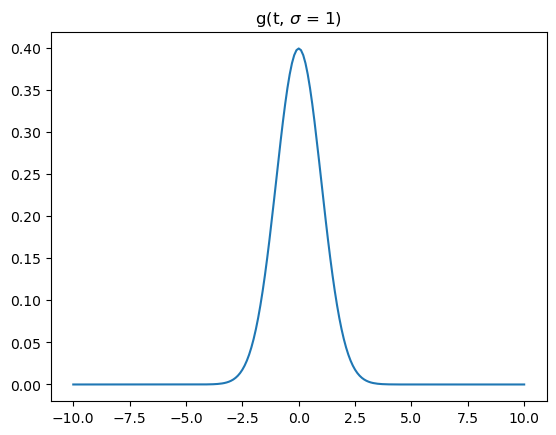

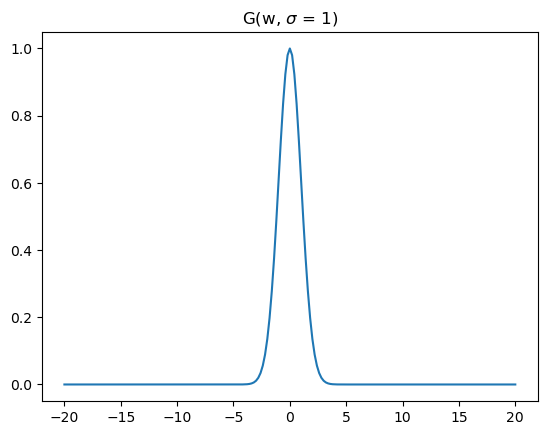

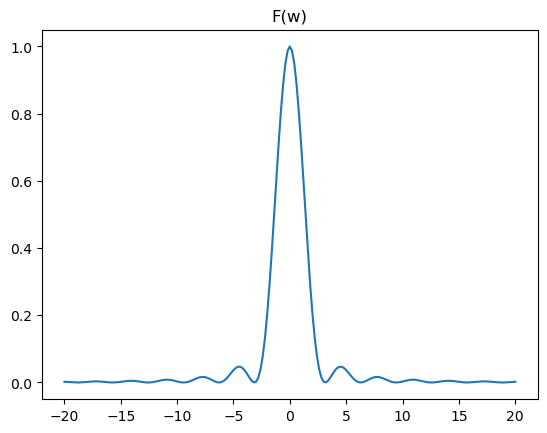

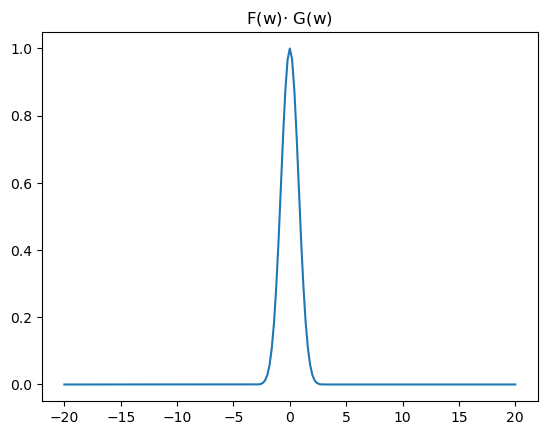

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def g(t: np.ndarray, sigma: float = 1) -> np.ndarray:
    return 1/np.sqrt(2 * np.pi * sigma**2) * np.exp(-t**2 / (2 * sigma ** 2))

def G(w: np.ndarray, sigma: float = 1) -> np.ndarray:
    return np.sqrt(2 * np.pi) / sigma * g(w, 1 / sigma)

def F(w: np.ndarray) -> np.ndarray:
    return np.sinc(w / np.pi)**2

t = np.linspace(-10, 10, 201)
w = np.linspace(-20, 20, 201)

plt.figure()
plt.title("g(t, $\sigma$ = 1)")
plt.plot(t, g(t))
plt.show()

plt.figure()
plt.title("G(w, $\sigma$ = 1)")
plt.plot(w, G(w))
plt.show()

plt.figure()
plt.title("F(w)")
plt.plot(w, F(w))
plt.show()

plt.figure()
plt.title("F(w)$\cdot$ G(w)")
plt.plot(w, G(w) * F(w))
plt.show()
    

By refering to the convolution theorem, explain the following sentence :
*"Filtering a signal with a Gaussian blur kills high frequencies."*

> *Write your answer here*
>
> According to the convolution theorem, we have that $\mathcal{F} (f(t) * g(t)) = F(w) \cdot G(w)$.
>
> We have a signal $f(t)$.
> 
> We want to apply a gaussian filter. To apply a filter, we must make a convolution between the signal and the filter. So it gives us $f(t) * g(t)$.
>
> Rather than applying directly the convolution, we use the convolution theorem, which says us that a convolution becomes a multiplication in the Fourier domain. So we multiply the FT of our signal and of the gaussian filter. As we know the FT of the signal and the filter, it's easy to compute.
>
> When we look the results obtain, we can observe that the FT $F(w)$ has some high frequency (it makes wavelets).
> The FT $G(w)$ of the gaussian filter is also gaussian, and we can see that $G(w)$ is equal to 0 on high frequency.
>
> So when we multiply the FT $F(w)$ of the signal by the FT $G(w)$ of the gaussian filter, we can observe on the graphic "$F(w) \cdot G(w)$" that as $G(w)$ is equal to 0 on high frequency, the result signal of the multiplication is a signal with no high frequency (the signal is very similar to $G(w)$). Then, we just have to apply the inverse FT to obtain the result of the convolution between the signal and the gaussian filter. The result is a signal with no high frequencies because in the Fourier domain, the multiplication with the Fourier Transform of the Gaussian filter has deleted the high frequencies, as shown on graphic $"F(w) \cdot G(w)$"
> 
> So it means that the convolution between a signal and a gaussian filter kill high frequency

(b) Do the same for the Gabor filter with $w_0 = 10$.

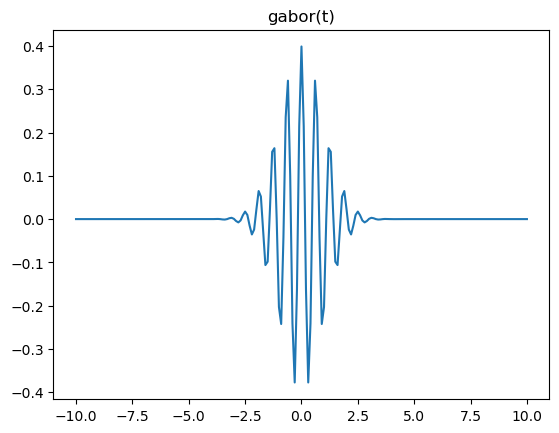

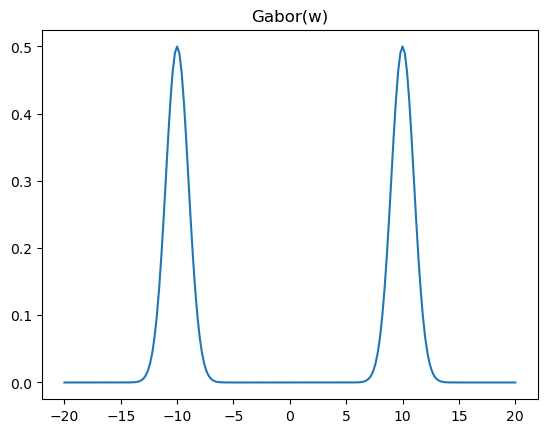

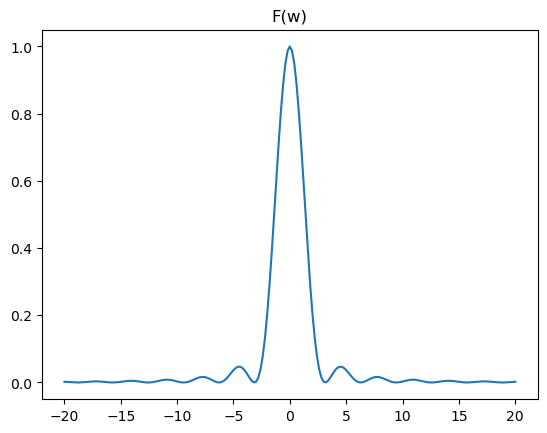

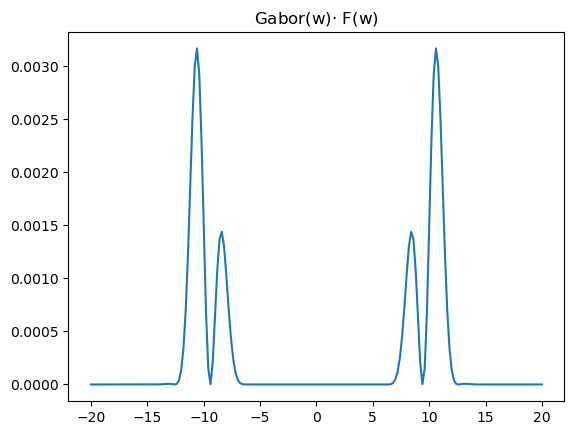

In [6]:
def gabor(t: np.ndarray, w_0: float = 10, sigma: float = 1) -> np.ndarray:
    return np.cos(w_0 * t) * g(t, sigma)

def Gabor(w: np.ndarray, w_0: float = 10, sigma: float = 1) -> np.ndarray:
    return np.sqrt(2 * np.pi) / (2 * sigma) * (g(w - w_0, 1/sigma) + g(w + w_0, 1/sigma))

plt.figure()
plt.title("gabor(t)")
plt.plot(t, gabor(t))
plt.show()

plt.figure()
plt.title("Gabor(w)")
plt.plot(w, Gabor(w))
plt.show()

plt.figure()
plt.title("F(w)")
plt.plot(w, F(w))
plt.show()

plt.figure()
plt.title("Gabor(w)$\cdot$ F(w)")
plt.plot(w, Gabor(w) * F(w))
plt.show()

Explain the following sentence :
*"Filtering with a Gabor filter at frequency $w_0$ only keeps the parts of the signal which have a frequency close to $w_0$."*

> *Write your answer here*
>
> According to the convolution theorem, applying a filter to a signal (so make a convolution between the signal and the filter) is equivalent to make a multiplication in the Fourier domain.
>
> Here, we can see that our Gabor filter select only the frequencies around the frequency $w_0 = 10$: we just have positive values around $|w_0|$ in the Fourier domain. So when we multiply the FT of our signal with the FT of the Gabor filter, we obtain a signal with only the frequencies around $|w_0|$ selected.
>
> And when we see the result of the multiplication in the Fourier domain ("Gabor(w)F(w)"), we see that effectively, just the frequencies near $w_0$ are kept. The other frequencies are killed.
>
> As the convolution theorem tel us that make a convolution is like make a multiplication in the Fourier domain, it means that apply a Gabor filter just keep the frequencies near $w_0$.
>
> That's why we can say that "Filtering with a Gabor filter at frequency $w_0$ only keeps the parts of the signal which have a frequency close to $w_0$

(c) Repeat again the same steps for the unsharp mask with $\gamma = 1.5$.

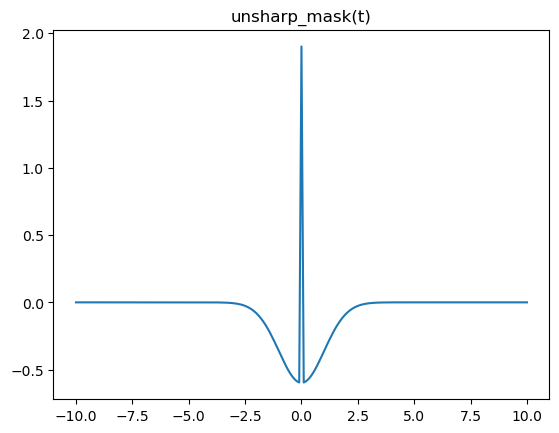

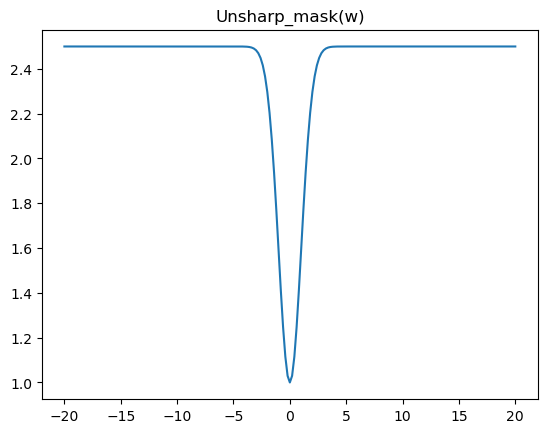

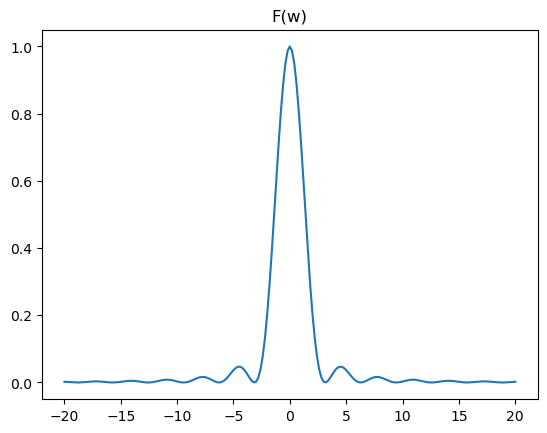

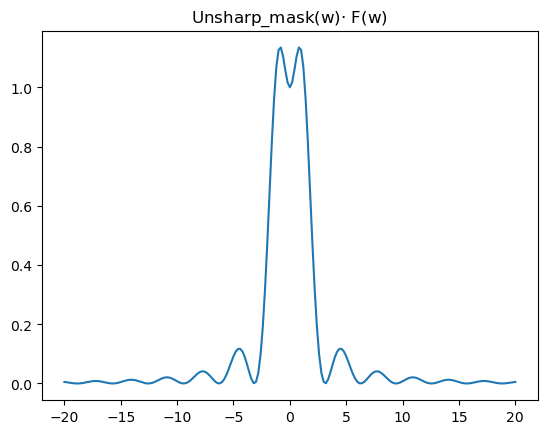

In [7]:
def delta(t: np.ndarray) -> np.ndarray:
    return t == 0

def unsharp_mask(t: np.ndarray, gamma: float = 1.5, sigma: float = 1) -> np.ndarray:
    return (1 + gamma) * delta(t) - gamma * g(t, sigma)

def Unsharp_mask(w: np.ndarray, gamma: float = 1.5, sigma: float = 1) -> np.ndarray:
    return 1 + gamma - gamma * G(w, sigma)

plt.figure()
plt.title("unsharp_mask(t)")
plt.plot(t, unsharp_mask(t))
plt.show()

plt.figure()
plt.title("Unsharp_mask(w)")
plt.plot(w, Unsharp_mask(w))
plt.show()

plt.figure()
plt.title("F(w)")
plt.plot(w, F(w))
plt.show()

plt.figure()
plt.title("Unsharp_mask(w)$\cdot$ F(w)")
plt.plot(w, Unsharp_mask(w) * F(w))
plt.show()

Explain : *"The Unsharp mask filtering sharpens the signal by increasing high frequency components."*

> *Write your answer here*
>
> We can see that the unsharp mask in the Fourier domain don't modify low frequencies because it's value is equal to 1 near 0 for low frequencies.
>
> But the unsharp mask in the Fourier domain is more than 1 for all the high frequencies, so when we make the multiplication of a signal with the unsharp mask in the Fourier domain, we increase the high frequencies by multiply it by something more than 0.
> And we can see this result if we observe the graphic "$Unsharp\_mask(w) \cdot F(w)$": the low frequency are kept (we are always to 1 for $w = 0$), but the high frequency are increased (we have for instance $F(5) \approx 0.07$ and $Unsharp\_mask(5) \cdot F(5) \approx 0.15$).
>
> So as the convolution theorem tel us that a convolution is like a multiplication in the Fourier domain, it means that apply a unsharp mask filter (apply a filter consist to make a convolution) increase high frequency components.

## Exercise 3 : The Dirac comb
*(1.5 points)*

The Dirac comb or train of impulses is the following "function":

$$W_T(t) = \sum_{k \in \mathbb{Z}} \delta(t - k \cdot T) $$

(a) Explain why sampling a function at rate $1/T$ is equivalent to multiplying it with $W_T(t)$.

> *Write your answer here*
>
> We have:
> $$W_T(t) = \sum_{k \in \mathbb{Z}} \delta(t - k \cdot T) $$
>
> With:
>
> $$\delta(n) = \left\{ \begin{matrix} 1 & \text{if} \ n=0 \\ 0 & \text{else} \end{matrix} \right.$$
>
> If we multiply a function $f(t)$ by $W_T(t)$ we have:
> $$f(t) \cdot \sum_{k \in \mathbb{Z}} \delta(t - k \cdot T)$$
>
> For a $k$ choosen, we have $f(t) \cdot \delta(t - k \cdot T)$. But $\delta(t - k\cdot T) = 1$ if $t - k\cdot T = 0 \Leftrightarrow t = k\cdot T$, else $\delta(t - k\cdot T) = 0$. So $f(t) \cdot \delta(t - k \cdot T) = f(k\cdot T)$
>
> So we have:
> $$f(t) \cdot \sum_{k \in \mathbb{Z}} \delta(t - k \cdot T) = \sum_{k \in \mathbb{Z}} f(t) \cdot \delta(t - k \cdot T) = \sum_{k \in \mathbb{Z}} f(k \cdot T)$$
>
> The function obtained is a function which is only defined on points
> $$ \cdots, -2T, -T, 0, T, 2T, \cdots$$
> and takes the values
> $$ \cdots, f(-2T), f(-T), f(0), f(T), f(2T), \cdots$$
>
> It's exactly the same thing that sampling a function at rate $1/T$ because when we sample a function at rate $1/T$, we have our function defined on points
> $$ \cdots, -2T, -T, 0, T, 2T, \cdots$$
> and the function takes the values
> $$ \cdots, f(-2T), f(-T), f(0), f(T), f(2T), \cdots$$

(b) Given any function $f(t)$ defined on $\mathbb{R}$, show that

$$(f * W_T) (t) = \sum_{k \in \mathbb{Z}} f(t - kT).$$

Explain why this function is periodic of period T.

> *Write your answer here*

(c) Illustrate point (b) with the triangular function:

$$
h(t) =
\left\{
	\begin{array}{ll}
		1-|t|  & \mbox{if } |t| \leq 1 \\
		0 & \mbox{otherwise.}
	\end{array}
\right.
$$

For various $T = 1$, $1.5$, $2$, $4$, plot on the same graph :

- The shifted functions $h(t - kT)$ on an interval $t \in [-5, 5]$ for each $k \in \mathbb{Z}$.
- The periodic signal $(h * W_T)(t)$

(d) You've seen in the course that


- $\mathcal{F}(W_T) = \frac{2 \pi}{T} \cdot W_{\frac{2 \pi}{T}}$
- $\mathcal{F}(f * g) = \mathcal{F}(f) \cdot \mathcal{F}(g)$
- $\mathcal{F}(f \cdot g) = \frac{1}{2 \pi} \mathcal{F}(f) * \mathcal{F}(g)$

Use these facts and points (a) and (b) to explain the following :


1. The Fourier transform of a periodic function is discrete (non-zero only at isolated points). Give an example.

2. The Fourier transform of a discrete signal is a periodic function. Give an example.

3. If $f(t)$ is both discrete and periodic, then its transform is also discrete and periodic and vice-versa. Give an example. (This last result plays a central role in the definition of the DFT.)

**Hint :** Start with any signal $f(t)$ and consider the Fourier Transform of $f * W_T$, $f \cdot W_T$ and $(f \cdot W_T) * W_S$.

> *Write your answer here*

## Exercise 4 : Shannon Nyquist bound
*(1.5 points)*

Consider a function $f(t)$ and its Fourier transform $\mathcal{F}(f)(w) = F(w)$.

(a) Sampling $f$ by using the Dirac comb $W_T$ , we showed the following in the class :

$$\mathcal{F}(f \cdot W_T)(\omega) = \frac{1}{T} \sum_{k \in \mathbb{Z}} F(w - j \cdot w_0), \quad \text{where } \omega_0 = \frac{2 \pi}{T} $$

Using this formula, explain the phenomenon of folding.

**Hint:** If this formula looks intimidating, just put $w=0$ and write out the sum explicitely.

> Your answer

(b) Suppose now that $F(w) = 0$, if $|w| > W$. What is the biggest sampling $T_{max}$ such that
the folding does not appear ?

**Remark:** We call $2π / T_{max}$ the Shannon-Nyquist rate.

> Your answer

(c) Consider the function $f(t) = \text{sinc}^2 (\frac{t}{2})$, which has FT $F(w) = h(w)$ the triangular function (see exercise 3).

- Find $W$ and $T_{max}$

- Plot on the same graph, the function $f(t)$ and its sampled version $f_s(t)$ for $T = π/2,π,2π,4\pi$.

- On a separate graph, plot the Fourier transform $F_s(w)$ of the sampled signal $f_s(t)$ for each $T$.

**Hint:** Use a range $t \in [-20,20]$ and a range $\omega \in [-10,10]$.

- Comment on the signal preservation when sampling if $T < T_{max}$ or $T > T_{max}$.

(d) **(Bonus)** Given a sampled signal $f_s(t)$ at time interval $T$, one can reconstruct the original signal $f(t)$ by interpolation using the Shannon-Whittaker interpolation formula:

$$f_{approx}(t) = \sum_{k \in \mathbb{Z}} f(k \cdot T) \cdot \text{sinc}(\pi \cdot \frac{t - kT}{T})$$

- Using the same function as in part (c), for each $T$, visualize on a same plot the original function $f(t)$ and its approximation $f_{approx}(t)$.

- Comment your result in view of the Shannon-Nyquist rate.